# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [40]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [41]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [42]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [43]:
data.shape
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 5391 rows and 6 columns.


In [44]:
data.isna().values.any()

False

In [45]:
data.duplicated().values.any()

False

In [46]:
for column in data.columns:
    print(type(column))
    
print("\nAll the columns in the dataset are strings.")

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>

All the columns in the dataset are strings.


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [47]:
# Remove the "$" in the USD_Production_Budget, USD_Worldwide_Gross, and USD_Domestic_Gross columns
data["USD_Production_Budget"] = data["USD_Production_Budget"].astype(str).str.replace("$", "")
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].astype(str).str.replace("$", "")
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].astype(str).str.replace("$", "")

# Remove the "," in the USD_Production_Budget, USD_Worldwide_Gross, and USD_Domestic_Gross columns
data["USD_Production_Budget"] = data["USD_Production_Budget"].astype(str).str.replace(",", "")
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].astype(str).str.replace(",", "")
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].astype(str).str.replace(",", "")

# Convert str to int 
data["USD_Production_Budget"] = pd.to_numeric(data["USD_Production_Budget"]) 
data["USD_Domestic_Gross"] = pd.to_numeric(data["USD_Domestic_Gross"]) 
data["USD_Worldwide_Gross"] = pd.to_numeric(data["USD_Worldwide_Gross"]) 

/var/folders/b1/xdxv1yx938s3p8rmk_gxt2kr0000gn/T/ipykernel_58298/4097103128.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["USD_Production_Budget"] = data["USD_Production_Budget"].astype(str).str.replace("$", "")
/var/folders/b1/xdxv1yx938s3p8rmk_gxt2kr0000gn/T/ipykernel_58298/4097103128.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].astype(str).str.replace("$", "")
/var/folders/b1/xdxv1yx938s3p8rmk_gxt2kr0000gn/T/ipykernel_58298/4097103128.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be trea

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [48]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])
data["Release_Date"]

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [49]:
average_production_budget = data.USD_Production_Budget.mean()
average_production_budget = np.floor(average_production_budget)
print(f"Average production budget of the films in the data set: ${average_production_budget}")

Average production budget of the films in the data set: $31113737.0


In [50]:
usd_worldwide_gross = data.USD_Worldwide_Gross.mean()
usd_worldwide_gross = np.floor(usd_worldwide_gross)
print(f"Average worldwide gross revenue of films: ${usd_worldwide_gross}")

Average worldwide gross revenue of films: $88855421.0


In [51]:
data.USD_Worldwide_Gross.min()

0

In [52]:
data.USD_Domestic_Gross.min()

0

In [53]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [111]:
data_clean.tail(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0,2010


The average film costs about 31m to make and makes around 3x that (or ~89m) in worldwide revenue. So that's encouraging.

But quite a lot of films lose money too. In fact, all the films in the bottom quartile lose money, since the average cost is 5 million and they only bring in 3.8m in worldwide revenue!

The minimum domestic and worldwide revenue is 0. That makes sense. If a film never gets screened or is cancelled, then this is the number we would expect to see here.

On the other hand, the highest production budget was 425,000,000 and the highest worldwide revenue was 2,783,918,982. 2.7 Billion revenue!

In [55]:
# hich film was the lowest budget film in the dataset?
data[data.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [56]:
# Which film was the highest budget film in the dataset?
data[data.USD_Production_Budget == 425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [57]:
data.USD_Domestic_Gross[data.USD_Domestic_Gross == 0].count()
print(f"Films that grossed $0 domestically: {data.USD_Domestic_Gross[data.USD_Domestic_Gross == 0].count()}")

Films that grossed $0 domestically: 512


In [58]:
zero_domestic = data[data.USD_Domestic_Gross == 0]

In [59]:
zero_domestic.sort_values("USD_Production_Budget", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


We see that there are 512 films in the dataset that had no revenue in the United States. However, the highest budget films with no revenue have a release date AFTER the date on which the dataset was compiled (May 1st, 2018)

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [60]:
data.USD_Worldwide_Gross[data.USD_Worldwide_Gross == 0].count()
print(f"Films that grossed $0 worldwide: {data.USD_Worldwide_Gross[data.USD_Worldwide_Gross == 0].count()}")

Films that grossed $0 worldwide: 357


When we check worldwide revenue instead, we see that there are 357 films that made no money internationally. Once again, some of the films have not been released yet at the time the data was compiled. However, 512 versus 357. Why is there a difference? 

The reason some international films were never screened in the United States.  In fact, we can see an example of this in our previous screenshot. "Don Gato, el inicio de la pandilla" made about $4.5$ million dollars in the box office, but nothing in the United States. Perhaps they should have screened it there too, considering it cost $$80$ million to make!

### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

So far, we've created subsets for our DataFrames based on a single condition. But what if we want to select our data based on more than one condition? For example, which films made money internationally (i.e., data.USD_Worldwide_Gross != 0), but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)? 

How would we create a filter for these two conditions? One approach is to use the .loc[] property combined with the bitwise and & operator.

In [61]:
international_releases =  data.loc[(data.USD_Domestic_Gross == 0) & 
                                   (data.USD_Worldwide_Gross != 0)]
print(f"Number of international releases: {len(international_releases)}")
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


Why does this work? Pandas is built on top of NumPy, which uses Python's bitwise operators. And these bitwise operators allow us to do comparisons on an element by element basis in both NumPy and Pandas!

## Using the .query() function to filter on multiple conditions

In [62]:
international_releases = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")
print(f"Number of international releases: {len(international_releases)}")
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [63]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [64]:
data[data.Release_Date > scrape_date]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [65]:
unreleased_movies = data[data.Release_Date > scrape_date]
print(f"Number of unreleased movies: {len(unreleased_movies)}")


Number of unreleased movies: 7


In [66]:
data_clean = data.drop(unreleased_movies.index)
data_clean.head(2)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0


### Films that Lost Money

Now we can turn our attention to films in the dataset that were not released at the time the data was collected. This is why films like Singularity and Aquaman had zero revenue.

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [67]:
money_losing_movies = data_clean.query("USD_Production_Budget > USD_Worldwide_Gross")

In [68]:
len(money_losing_movies)/len(data_clean) * 100

37.27711738484398

we see that a whopping 37.2% 😮 of films do not recoup their production budget at the box office. 💸💸💸 Who knew that film finance could be so risky! 😬

We're now ready to visualise our data

# Seaborn for Data Viz: Bubble Charts

To create a .scatterplot(), all we need to do is supply our DataFrame and the column names that we'd like to see on our axes.

And to style our chart we can simply configure the Axes object that is returned from sns.scatterplot().

But the reason we're using Seaborn is because of the hue and size parameters that make it very easy to create a bubble chart. These parameters allow us to colour the data and change their size according to one of the columns in our DataFrame.



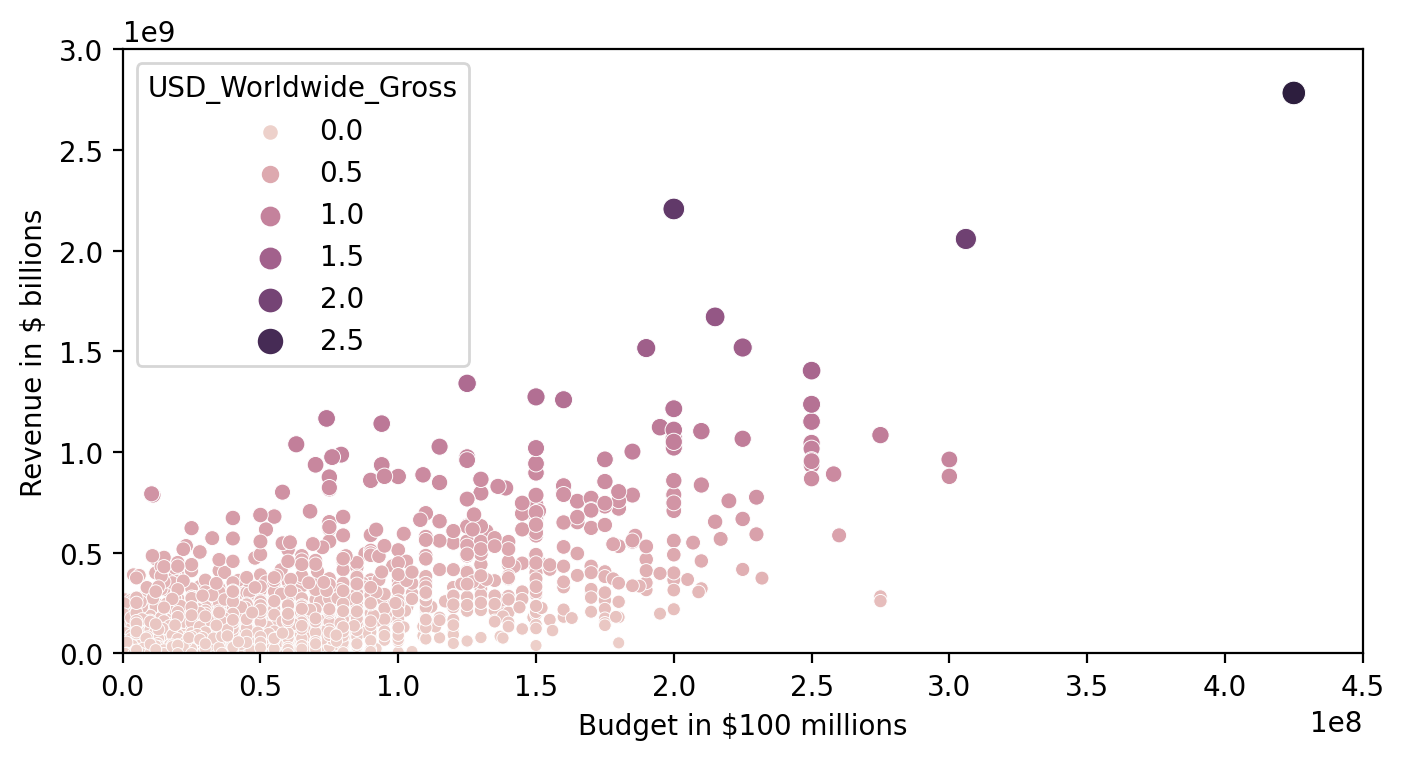

In [69]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size="USD_Worldwide_Gross")


ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions') 

plt.show()

Now our higher grossing movies are bigger and darker on our chart. That's super handy. But Seaborn offers a number of convenient styling options as well.

To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's with keyword. We've seen with used already when it comes to opening files in previous lessons.

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



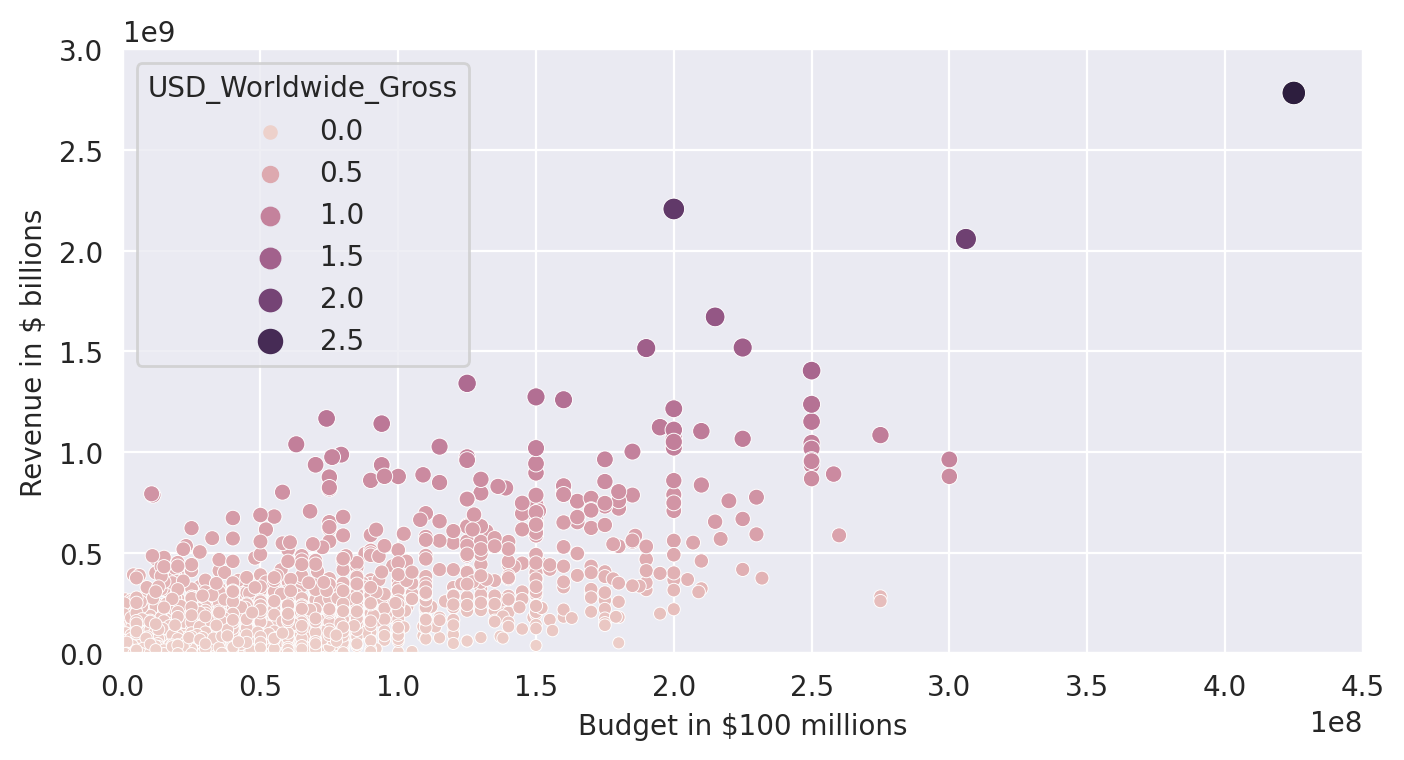

In [70]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean,
                         x='USD_Production_Budget', 
                         y='USD_Worldwide_Gross',
                         hue='USD_Worldwide_Gross', # colour
                         size="USD_Worldwide_Gross")


ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions') 

plt.show()

In addition to 'darkgrid', Seaborn has a number of built-in themes. so you can style your chart very quickly. Try out 'whitegrid', 'dark',  or 'ticks' for example.

In [71]:
data_clean.head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000


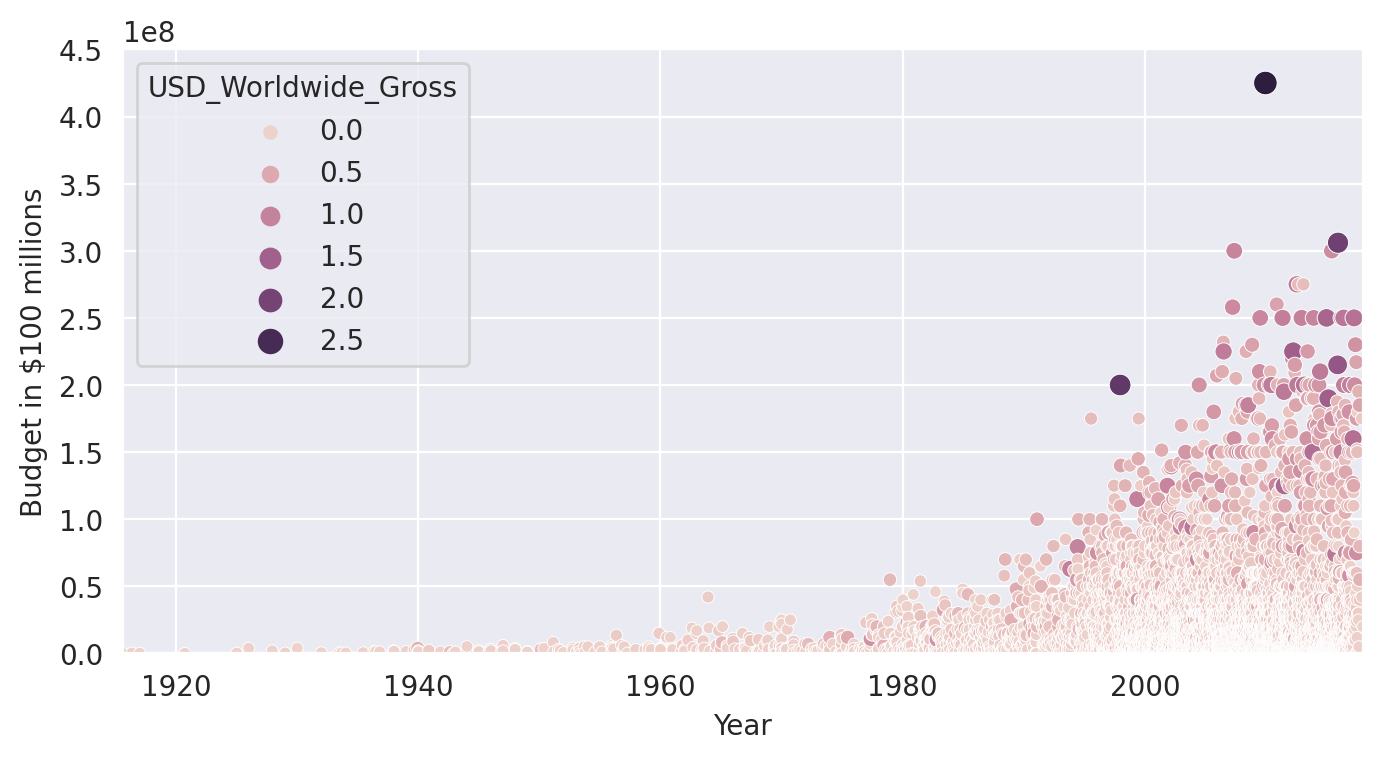

In [72]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean,
                         x='Release_Date', 
                         y='USD_Production_Budget',
                         hue='USD_Worldwide_Gross', # colour
                         size="USD_Worldwide_Gross")
    
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

plt.show()

What do we see here? What is this chart telling us? Well, first off, movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [73]:
dates = pd.DatetimeIndex(data=data_clean.Release_Date)
decades = dates.year // 10 * 10

data_clean["Decade"] = decades

data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [74]:
old_films = data_clean[data_clean["Decade"] < 1969]
new_films = data_clean[data_clean["Decade"] > 1970]

In [75]:
print(f"Number of films released prior to 1970: {old_films.shape[0]}")

Number of films released prior to 1970: 153


In [76]:
old_films["USD_Production_Budget"].max()
most_exp_old_film = old_films[old_films["USD_Production_Budget"] == 42000000]


print(f"The most expensive film made prior to 1970 was: {most_exp_old_film['Movie_Title'][109]}")

The most expensive film made prior to 1970 was: Cleopatra


# Seaborn Regression Plots

Let's visualise the relationship between the movie budget and the worldwide revenue using linear regression. Seaborn makes this incredibly easy with the .regplot() function.

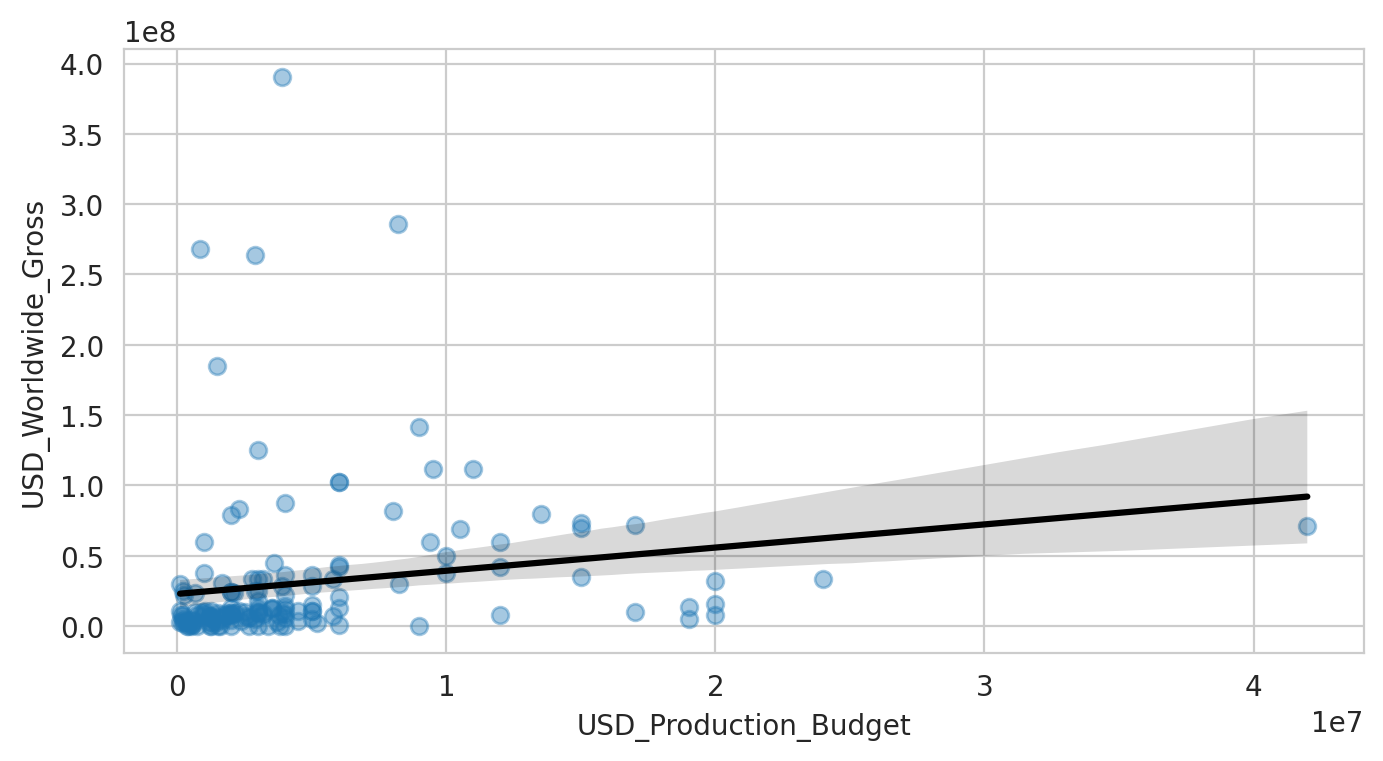

In [100]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
     axes = sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})



What do we see here? Well, first off we can spot Cleopatra on the far right. But also, we see that many lower budget films made much more money! The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all!

But does the same hold true for the newer films?

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

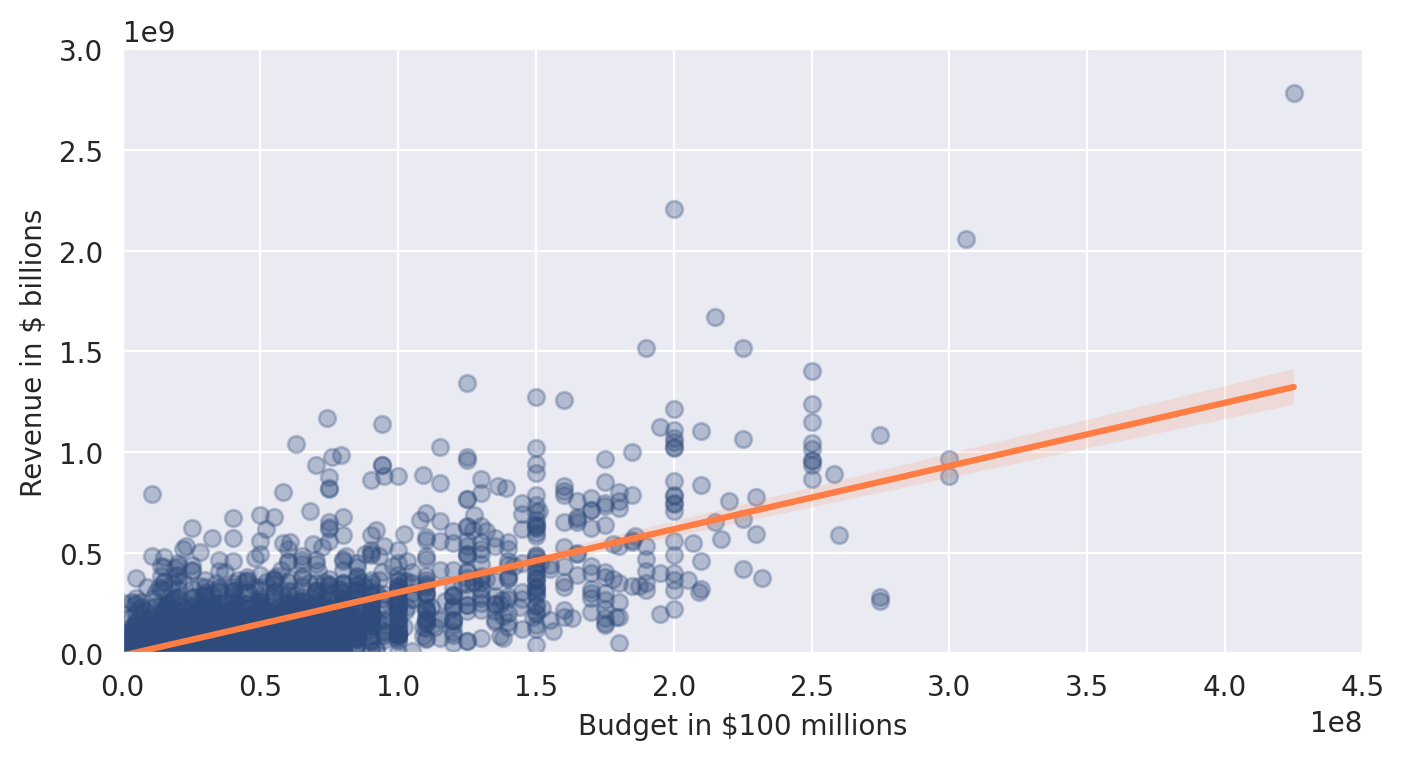

In [85]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.3},
            line_kws = {'color': '#ff7c43'},
            color="#2f4b7c")

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

How do we interpret our chart? This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line (pun intended). Also, the confidence interval is much narrower. We also see that a film with a $150 million budget is predicted to make slightly under $500 million by our regression line.

All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

But how much of the variation in revenue does the budget actually explain? And how much extra revenue can we expect for an additional $1 increase in the budget? To find out, we need to dive into the numbers underlying our regression model.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

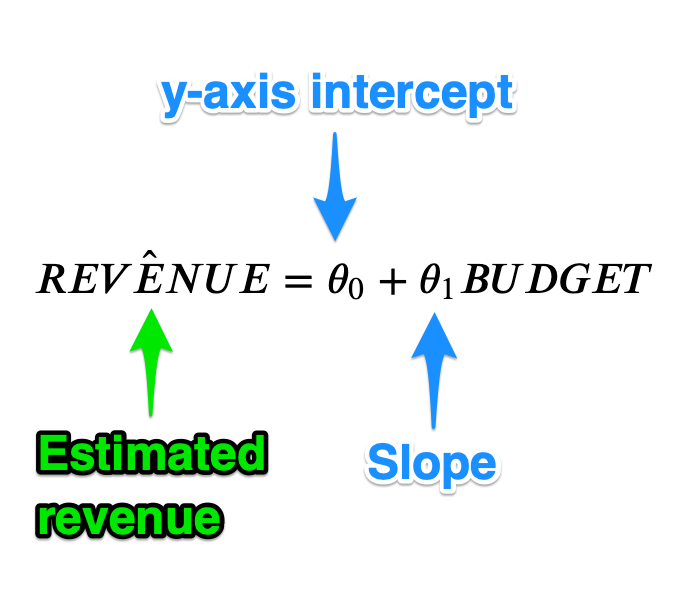

To find the best possible line, our regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0. The slope tells us how much extra revenue we get for a $1 increase in the movie budget.

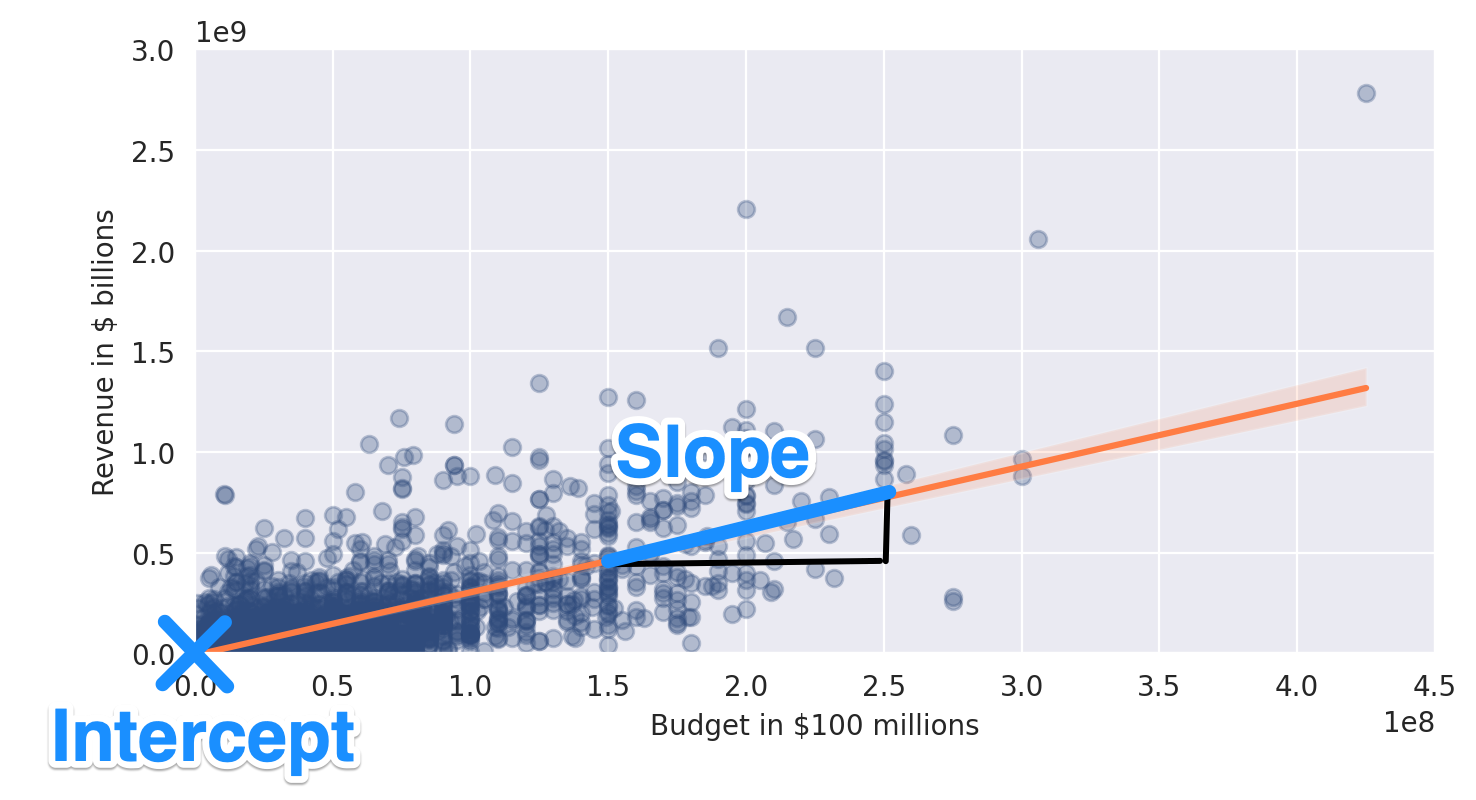

In [86]:
regression = LinearRegression()

In [87]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])
# Response Variable or Target
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])

In [88]:
# Find the best-fit line 
regression.fit(X, y)

LinearRegression()

In [90]:
# Theta zero
regression.intercept_

array([-10278584.79397991])

In [91]:
# Theta one 
regression.coef_

array([[3.13834648]])

Both intercept_ and coef_ are simply attributes of the LinearRegression object. Don't worry about the underscores at the end, these are simply part of the attribute names that the scikit-learn developers have chosen.

How do we interpret the y-intercept? Literally, means that if a movie budget is $$0, the estimated movie revenue is -$10.27 million. Hmm... so this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that you can't have negative revenue or a negative budget, we have to be careful about interpreting our very simple model too literally. After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points (rather than at the extreme left or right).

What about the slope? The slope tells us that for every extra $$1 in the budget, movie revenue increases by $3.1. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.



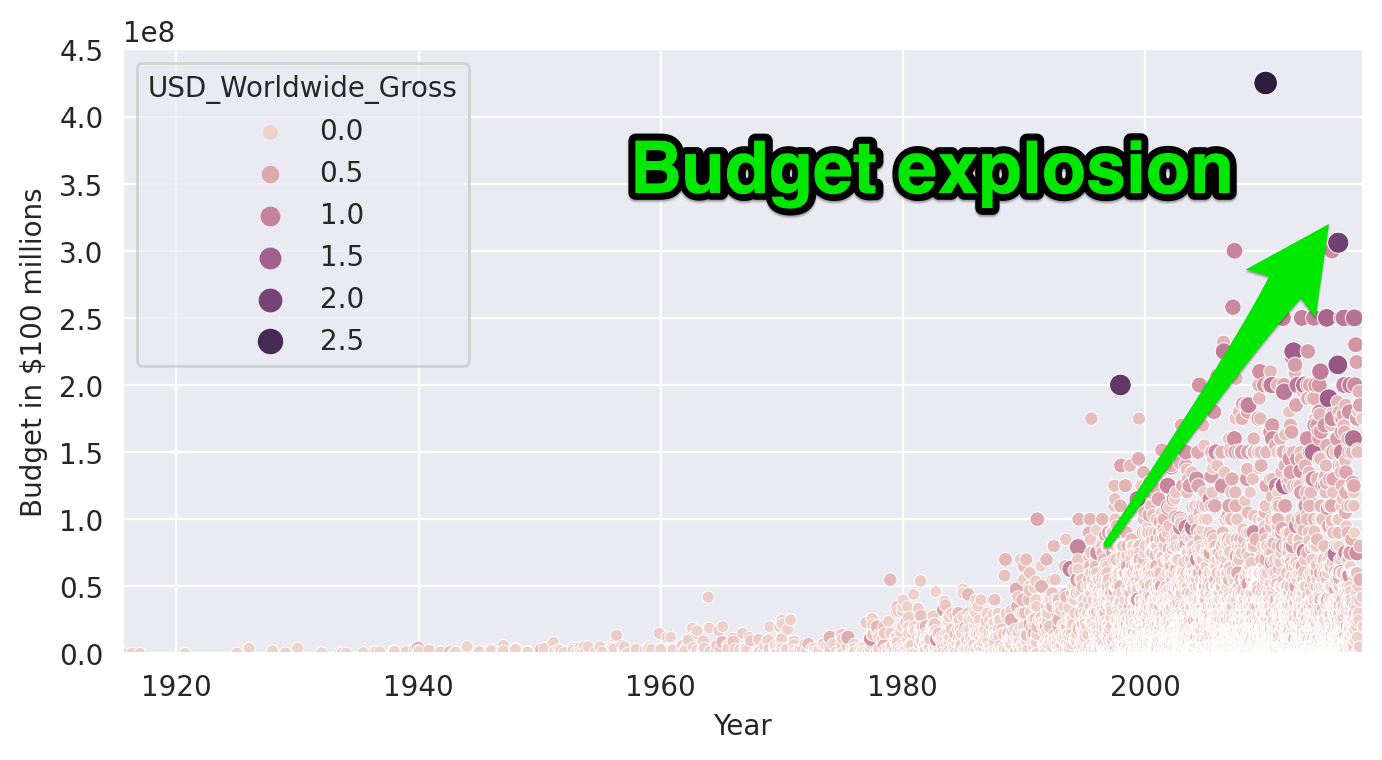

## R-Squared: Goodness of Fit

One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

In [92]:
# R-squared
regression.score(X, y)

0.564250171393927

We see that our r-squared comes in at around 0.564. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

Remember how we were quite sceptical about our regression looking at the chart for our old_films? 

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [93]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
# Response Variable or Target
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

In [94]:
# Find the best-fit line 
regression.fit(X, y)

LinearRegression()

In [108]:
# Theta zero
regression.intercept_

array([22821538.63508038])

In [109]:
# Theta one 
regression.coef_

array([[1.64771314]])

In [110]:
# R-squared
regression.score(X, y)

0.02937258620576877

Running the numbers this time around, we can confirm just how inappropriate the linear model is for the pre-1970 films. We still see a positive relationship between budgets and revenue, since the slope (our theta-one) is 1.6, but the r-squared is very low.

Recall our linear plot for the old_films. This makes sense considering how poorly our data points aligned with our line earlier.

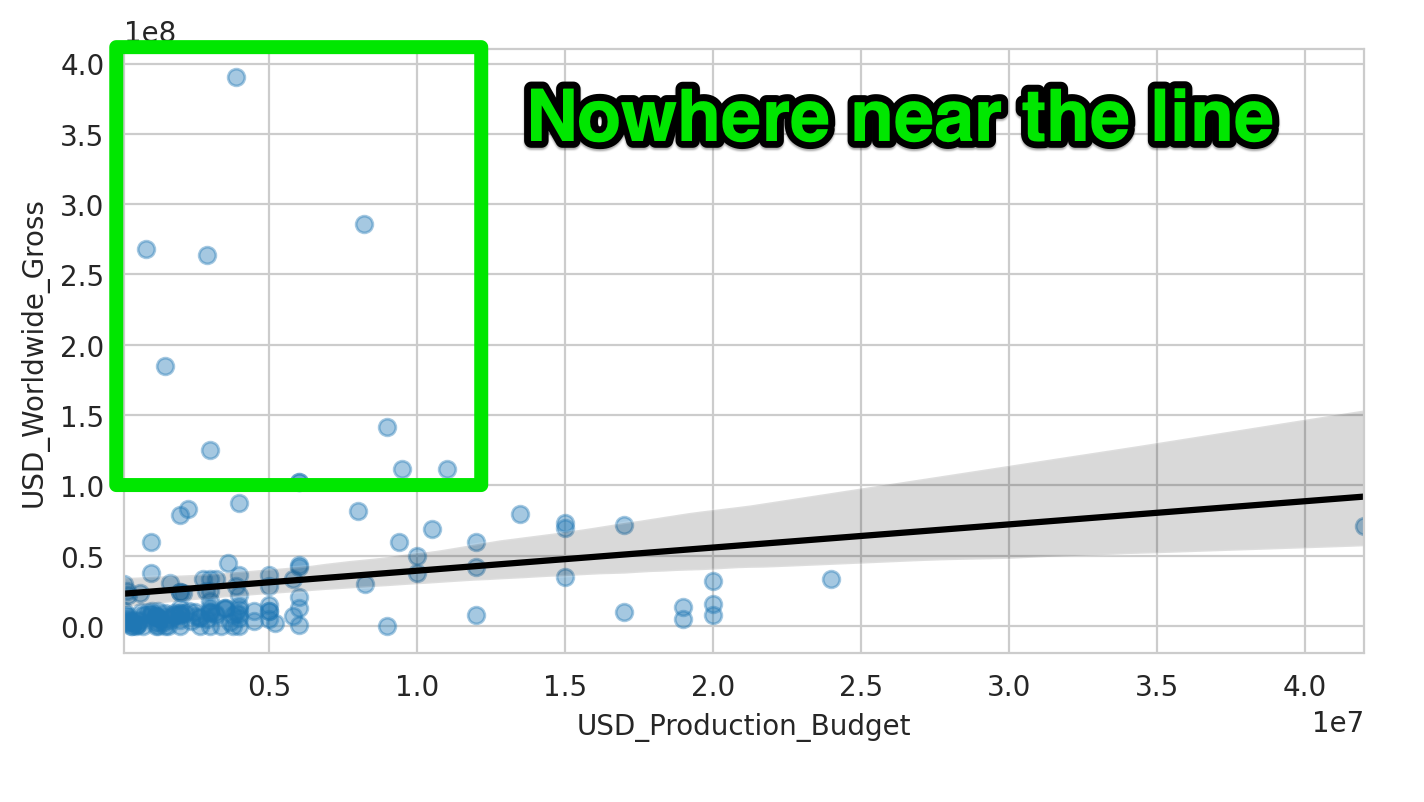

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [107]:
22821538 + 1.64771314 * 350000000

599521137.0

In [105]:
revenue

array([7.98753855e+15])

In [106]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
